<a href="https://colab.research.google.com/github/Dhanasree-Rajamani/DeepLearningProject/blob/main/Project/DL_Project_pretrained.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Use a pretrained YOLOv7 model to perform grocery object detection

###Download YOLOv7 repository and install requirements

In [1]:
!git clone https://github.com/WongKinYiu/yolov7
%cd yolov7
!pip install -r requirements.txt

Cloning into 'yolov7'...
remote: Enumerating objects: 1157, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 1157 (delta 10), reused 15 (delta 8), pack-reused 1139
Receiving objects: 100% (1157/1157), 70.41 MiB | 14.59 MiB/s, done.
Resolving deltas: 100% (498/498), done.
/content/yolov7
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 21.1 MB/s eta 0:00:00


###Use the pretrained model to perform grocery object detection

Downloading: "https://github.com/WongKinYiu/yolov7/zipball/main" to /root/.cache/torch/hub/main.zip


Adding autoShape... 
image 1/1: 480x480 12 broccolis
Speed: 15.0ms pre-process, 200.8ms inference, 17.8ms NMS per image at shape (1, 3, 640, 640)


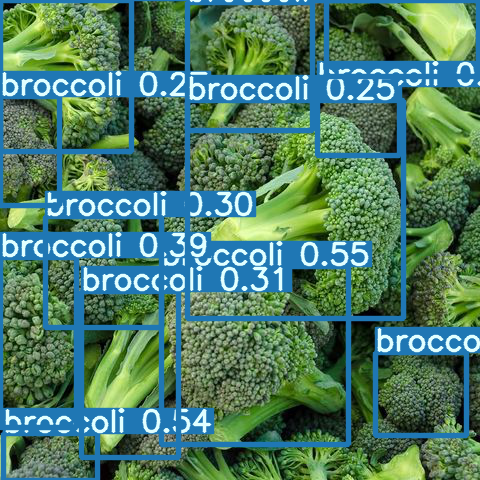

In [3]:
import torch

model = torch.hub.load('WongKinYiu/yolov7', 'yolov7', force_reload=True)
im = '/content/broccoli.jpg'  

results = model(im)  # inference
results.print()  # or .show(), .save(), .crop(), .pandas(), etc.

results.show()

### Gradio App
- lets you upload an image and perform grocery object detection on the image
- lets you click an image using camera and perform grocery object detection on the image

In [2]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.4/17.4 MB 86.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 74.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.1/288.1 kB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.2/137.2 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 k

In [3]:
import gradio as gr
import cv2
from PIL import ImageDraw, ImageFont
import numpy as np
from torchvision.transforms import functional as F
import torch
from PIL import Image

###Upload an image and perform grocery object detection

In [4]:
# Load the YOLO model
model = torch.hub.load('WongKinYiu/yolov7', 'yolov7', force_reload=True)

def process_image(input_image):
    try:
        # Convert Gradio input image (numpy array) to PIL Image
        input_image = Image.fromarray(input_image.astype('uint8'), 'RGB')
        
        # Perform inference
        results = model(input_image)
        
        # Get the annotated image from the results
        annotated_image = results.render()[0]
        
        # Convert the annotated image to numpy array for Gradio
        annotated_image = annotated_image[:, :, ::-1]  # Convert RGB to BGR
        return annotated_image

    except Exception as e:
        print(f"Error: {str(e)}")

iface = gr.Interface(
    fn=process_image,
    inputs="image",
    outputs="image",
    title="Know Your Grocery!! powered by YOLOv7",
    description="Upload an image and detect grocery objects using YOLOv7.",
    allow_flagging=False,
    theme="default",
    layout="vertical",
    server_port=7860
)

iface.launch()



/usr/local/lib/python3.10/dist-packages/torch/hub.py:286: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/WongKinYiu/yolov7/zipball/main" to /root/.cache/torch/hub/main.zip
/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.

100%|██████████| 72.1M/72.1M [00:00<00:00, 206MB/s]



Adding autoShape... 


<ipython-input-4-3070bd22534c>:22: UserWarning: `layout` parameter is deprecated, and it has no effect
  iface = gr.Interface(
<ipython-input-4-3070bd22534c>:22: UserWarning: `server_port` is deprecated in `Interface()`, please use it within `launch()` instead.
  iface = gr.Interface(
/usr/local/lib/python3.10/dist-packages/gradio/interface.py:323: UserWarning: The `allow_flagging` parameter in `Interface` nowtakes a string value ('auto', 'manual', or 'never'), not a boolean. Setting parameter to: 'never'.
  warnings.warn(


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

###Click an image using camera and perform grocery object detection

In [5]:
# Load the YOLOv7 model
model = torch.hub.load('WongKinYiu/yolov7', 'yolov7', force_reload=True)

def process_image(input_image):
    try:
        # Convert Gradio input image (numpy array) to PIL Image
        input_image = Image.fromarray(input_image.astype('uint8'), 'RGB')
        
        # Perform inference
        results = model(input_image)
        
        # Get the annotated image from the results
        annotated_image = results.render()[0]
        
        # Convert the annotated image to numpy array for Gradio
        annotated_image = annotated_image[:, :, ::-1]  # Convert RGB to BGR
        return annotated_image

    except Exception as e:
        print(f"Error: {str(e)}")

iface = gr.Interface(
    fn=process_image,
    inputs=gr.inputs.Image(source="webcam", tool="opencv", type="numpy"),
    outputs="image",
    title="Know Your Grocery!! powered by YOLOv7",
    description="Click a photo and Detect grocery products in the image using YOLOv7.",
    allow_flagging=False,
    theme="default",
    layout="vertical",
    server_port=7860
)

iface.launch(inbrowser=True)


Downloading: "https://github.com/WongKinYiu/yolov7/zipball/main" to /root/.cache/torch/hub/main.zip


Adding autoShape... 


/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:259: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:262: UserWarning: `optional` parameter is deprecated, and it has no effect
  super().__init__(
<ipython-input-5-c24bace1e4a5>:22: UserWarning: `layout` parameter is deprecated, and it has no effect
  iface = gr.Interface(
<ipython-input-5-c24bace1e4a5>:22: UserWarning: `server_port` is deprecated in `Interface()`, please use it within `launch()` instead.
  iface = gr.Interface(
/usr/local/lib/python3.10/dist-packages/gradio/interface.py:323: UserWarning: The `allow_flagging` parameter in `Interface` nowtakes a string value ('auto', 'manual', or 'never'), not a boolean. Setting parameter to: 'never'.
  warnings.warn(


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>